# CSVAE Implementation

Here we're testing out our CSVAE implementation. We used two [Github](https://github.com/qq456cvb/CSVAE) [repos](https://github.com/alexlyzhov/latent-subspaces) as references.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from jax import random
from jax.experimental.stax import Elu, Sigmoid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets

from jax_csvae import create_csvae

rng_key = random.PRNGKey(0)

Text(0.5, 0, 'Z Label')

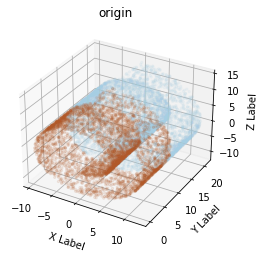

In [ ]:
X, _ = sklearn.datasets.make_swiss_roll(10000)
y = (X[:, 1] < 10).astype('int32')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='.', alpha=0.1, c=y, cmap='Paired')
ax.set_title('origin')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
w_latent_dim = 2
z_latent_dim = 2

w_enc_params = {
    'input_dim': 4,
    'hidden_widths': [64, 64, 64],
    'activation_fn': Elu,
    'output_dim': w_latent_dim * 2
}
z_enc_params = {
    'input_dim': 3,
    'hidden_widths': [64, 64, 64],
    'activation_fn': Elu,
    'output_dim': z_latent_dim * 2
}
x_dec_params = {
    'input_dim': z_latent_dim + w_latent_dim,
    'hidden_widths': [64, 64, 64],
    'activation_fn': Elu,
    'output_dim': 3
}
y_dec_params = {
    'input_dim': z_latent_dim,
    'hidden_widths': [64, 64, 64],
    'activation_fn': Elu,
    'output_dim': 1,
    'output_activation_fn': Sigmoid
}

csvae = create_csvae(rng_key, w_enc_params, z_enc_params, x_dec_params, y_dec_params)

In [ ]:
csvae, history = csvae.fit(rng_key, (X, y), step_size=1e-3, max_iter=100)

100%|██████████| 100/100 [02:43<00:00,  1.63s/it]


<AxesSubplot:>

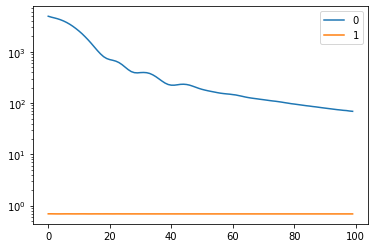

In [ ]:
pd.DataFrame(history, dtype='float32').plot.line(logy=True)

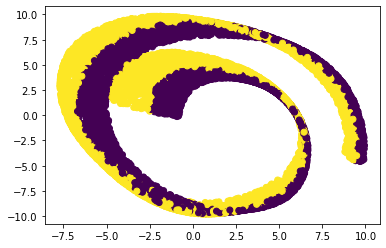

In [ ]:
z = csvae.z_encode(X)
plt.scatter(z[:,0], z[:,1], c=y)

In [ ]:
w = csvae.w_encode(np.hstack((X, y.reshape(-1, 1))))

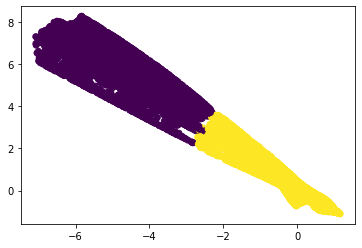

In [ ]:
plt.scatter(w[:,0], w[:,1], c=y)